In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from difflib import SequenceMatcher

In [13]:
from google.colab import files
uploaded = files.upload()

Saving menu.csv to menu (1).csv


In [0]:
df = pd.read_csv('menu.csv')

In [15]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [0]:
df['Total Calories'] = df.Calories+df['Calories from Fat']

#**EDA**#

## **Calories in McDonald's Menu**

In [0]:
print("Average Calories contained in overall McD's menu is {:3.1f} kkal".format(df['Total Calories'].mean()))

**Let's see, which menu contained the highest calories.**

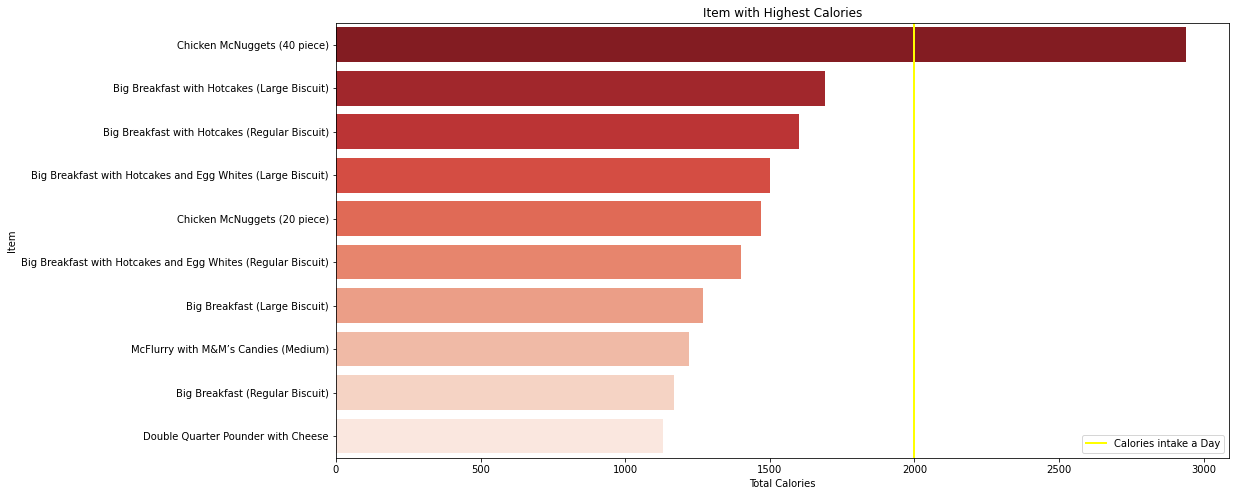

In [37]:
#@title
df = df.sort_values('Total Calories', ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(16,8))

ax = sns.barplot(x=df['Total Calories'].head(10), y=df.Item.head(10), palette='Reds_r').set(title='Item with Highest Calories')
ax = plt.axvline(2000,linewidth=2, color='yellow', label='Calories intake a Day')
ax = plt.legend()

If we divide 2000 kkal by 3 meals time, we get 667 kkal per-meal. Interestingly, Many of breakfast menus exceeded this number, so it's a bad way to start a day!

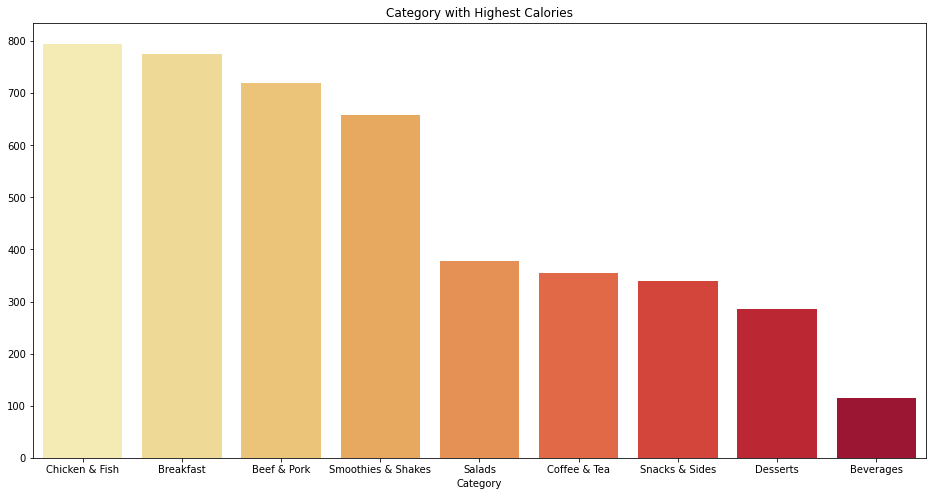

In [35]:
#@title
fig,ax = plt.subplots(figsize=(16,8))

df2 = df.groupby('Category')['Total Calories'].mean().sort_values(ascending=False)

ax = sns.barplot(x=df2.index,y=df2.values, order=df2.index, palette = 'YlOrRd').set(title='Category with Highest Calories')

It turns out that Chicken & Fish have the highest mean of calories. 

#**Macronutrients**#

### **Carbohydrate**

In [0]:
print("Average carbohydrate contained in overall McD's menu is {:3.1f} gram".format(df.Carbohydrates.mean()))

Average carbohydrate contained in overall McD's menu is 47.3 gram


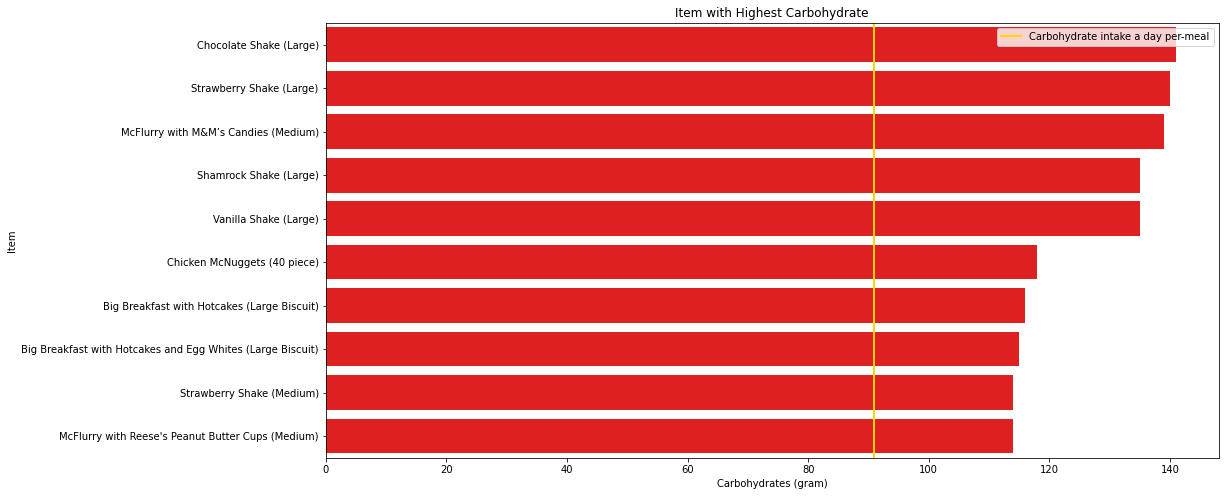

In [0]:
#@title
df = df.sort_values('Carbohydrates', ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(16,8))

ax = sns.barplot(x=df.Carbohydrates.head(10), y=df.Item.head(10), color='red').set(title='Item with Highest Carbohydrate', xlabel='Carbohydrates (gram)')
ax = plt.axvline(275//3,linewidth=2, color='gold', label='Carbohydrate intake a day per-meal')
plt.legend()

Many menus from Smoothies & Shakes have so much calories. Let's see the category with the highest carbohydrate.

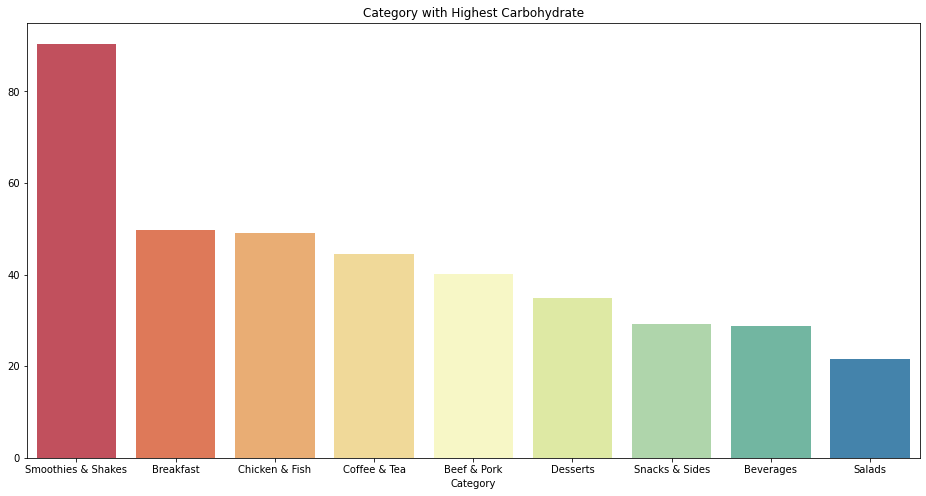

In [32]:
#@title

fig,ax = plt.subplots(figsize=(16,8))

df2 = df.groupby('Category')['Carbohydrates'].mean().sort_values(ascending=False)
ax = sns.barplot(x=df2.index,y=df2.values, palette='Spectral').set(title='Category with Highest Carbohydrate')

It turns out that Smoothies & Shakes category contain high carbohydrate per-portion. We have to limit our consumption of this category.

**Now we will see what items have the highest sugar!**

### Sugar

In [0]:
print("Average sugar contained in overall McD's menu is {:3.1f} gram".format(df.Sugars.mean()))

Average sugar contained in overall McD's menu is 29.4 gram


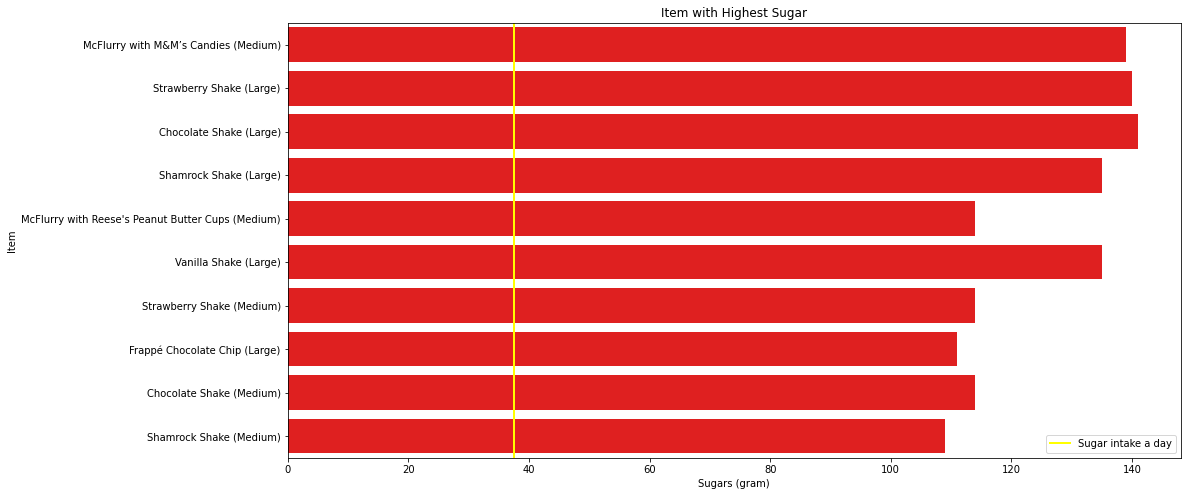

In [0]:
#@title
df = df.sort_values('Sugars', ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(16,8))

ax = sns.barplot(x=df.Carbohydrates.head(10), y=df.Item.head(10), color='Red').set(title='Item with Highest Sugar', xlabel='Sugars (gram)')
ax = plt.axvline(37.5,linewidth=2, color='yellow', label='Sugar intake a day')
plt.legend()

Surprisingly, all of the items above exceed the sugar we need per day. The maximum amount of added sugars we should eat in a day are Men: 37.5 grams per day and Women: 25 grams per day. It would be nice if we reduce the consumption of items that have high sugar, especially if consume it in large quantities.

### **Protein**

In [0]:
print("Average protein contained in overall McD's menu is {:3.1f} gram".format(df.Protein.mean()))

Average protein contained in overall McD's menu is 13.3 gram


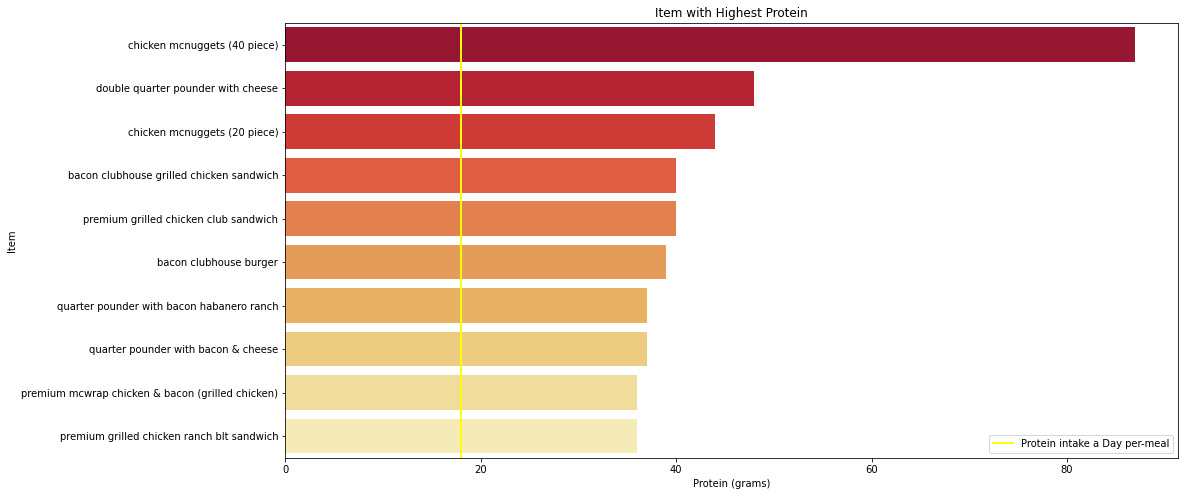

In [0]:
#@title
df = df.sort_values('Protein', ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(16,8))

ax = sns.barplot(x=df.Protein.head(10), y=df.Item.head(10), palette='YlOrRd_r').set(title='Item with Highest Protein', xlabel='Protein (grams)')
ax = plt.axvline(56//3,linewidth=2, color='yellow', label='Protein intake a Day per-meal')
ax = plt.legend()

Menu with Chicken or Pork contains high protein. Obviously, they're proteins.

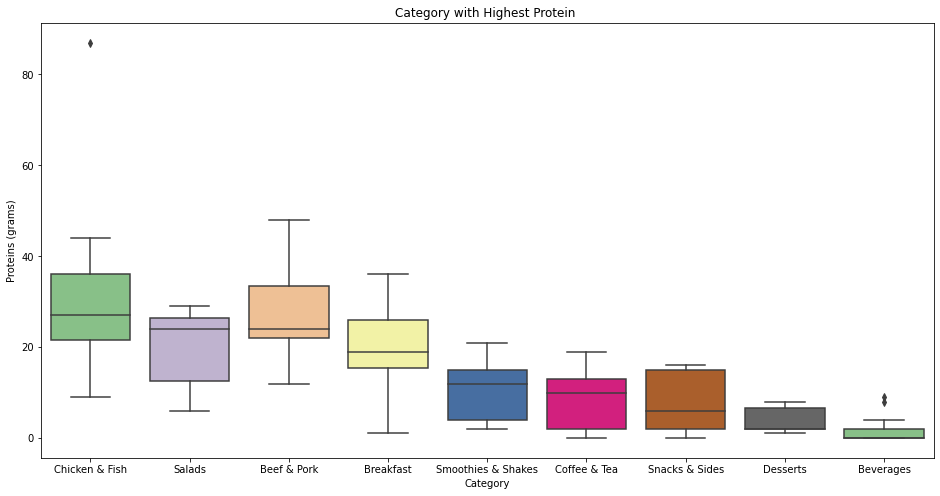

In [0]:
#@title

fig,ax = plt.subplots(figsize=(16,8))

df2 = df.groupby('Category')['Protein'].median().sort_values(ascending=False)

ax = sns.boxplot(x='Category',y='Protein', data=df, order=df2.index, palette='Accent').set(title='Category with Highest Protein ', ylabel='Proteins (grams)')

### **Fat**

In [0]:
print("Average fat contained in overall McD's menu is {:3.1f} gram".format(df['Total Fat'].mean()))

Average fat contained in overall McD's menu is 14.2 gram


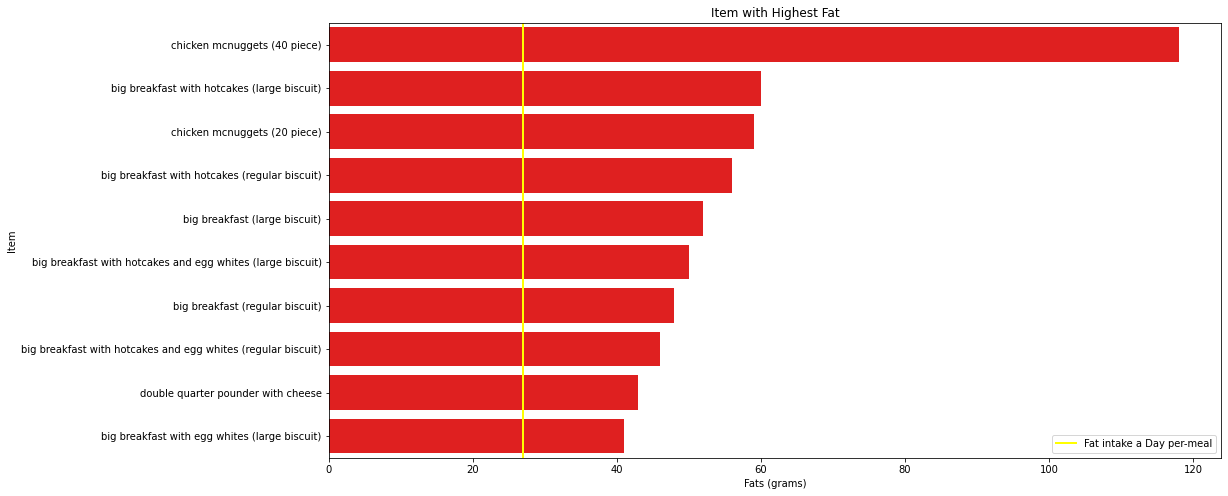

In [0]:
#@title
df = df.sort_values('Total Fat', ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(16,8))

ax = sns.barplot(x=df['Total Fat'].head(10), y=df.Item.head(10), color='red').set(title='Item with Highest Fat', xlabel='Fats (grams)')
ax = plt.axvline(83//3,linewidth=2, color='yellow', label='Fat intake a Day per-meal')
ax = plt.legend()

Menu from Breakfast category have high fat. Let's see for Bad and Good Fat.

#### Bad Fat
Bad fat is a name for Trans Fat. 

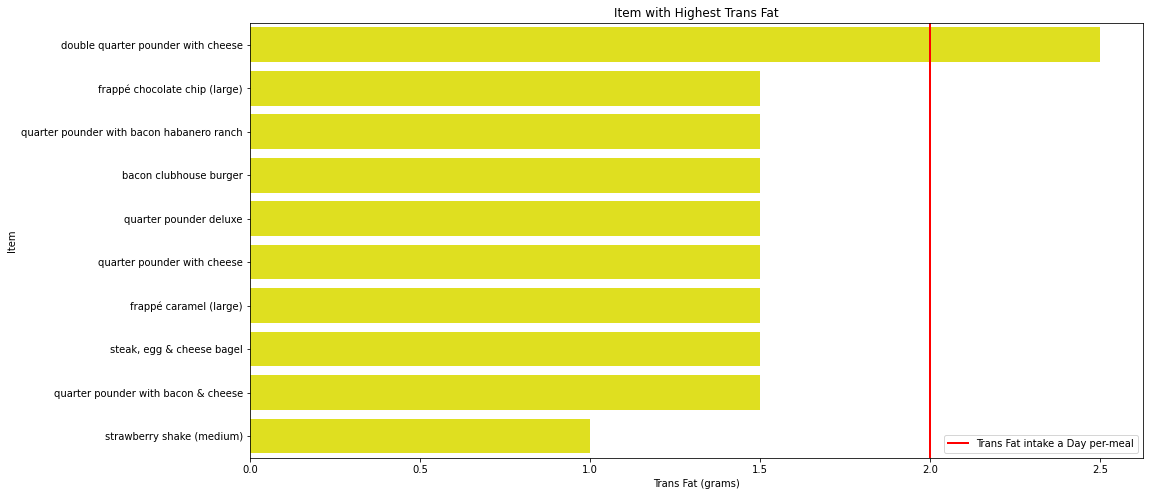

In [0]:
#@title
df = df.sort_values('Trans Fat', ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(16,8))

ax = sns.barplot(x=df['Trans Fat'].head(10), y=df.Item.head(10), color='yellow').set(title='Item with Highest Trans Fat', xlabel='Trans Fat (grams)')
ax = plt.axvline(2,linewidth=2, color='red', label='Trans Fat intake a Day per-meal')
ax = plt.legend()

Burger and frappe menu from McD contain so much "bad fat" in a portion, so we have to limit the consumption. 

### Good Fat

Good fat is a name for Saturated Fat. 

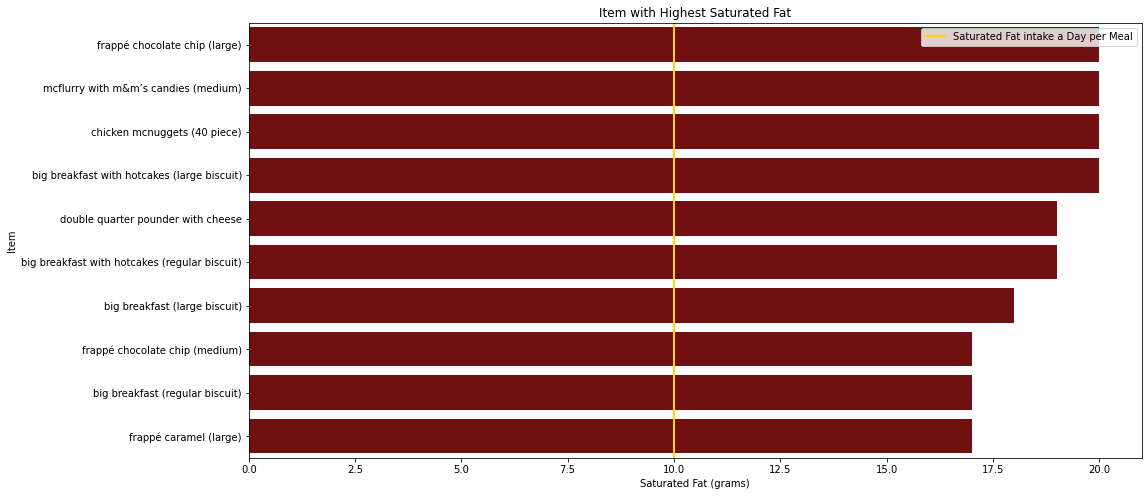

In [0]:
#@title
df = df.sort_values('Saturated Fat', ascending=False).reset_index(drop=True)

fig,ax = plt.subplots(figsize=(16,8))

ax = sns.barplot(x=df['Saturated Fat'].head(10), y=df.Item.head(10), color='Maroon').set(title='Item with Highest Saturated Fat', xlabel='Saturated Fat (grams)')
ax = plt.axvline(30//3,linewidth=2, color='gold', label='Saturated Fat intake a Day per Meal')
ax = plt.legend()

#**Micronutrients**#

### **Vitamin A**

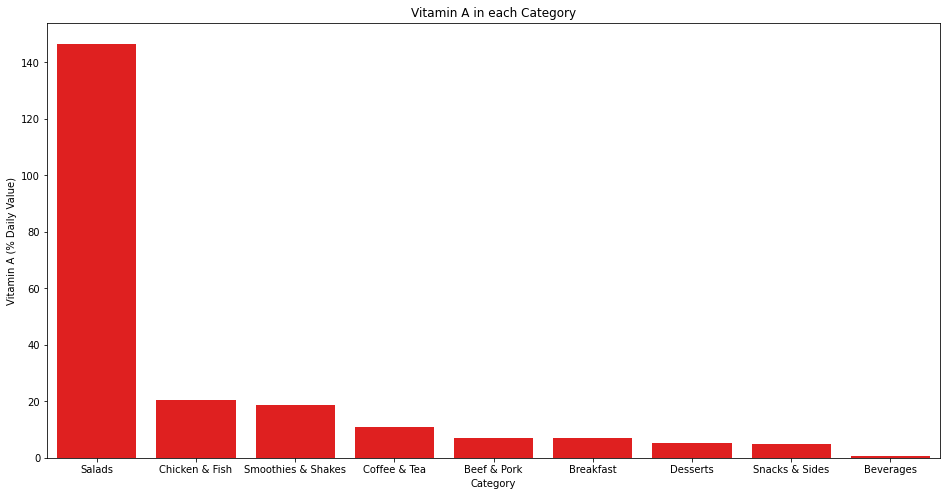

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

cat = df.groupby('Category')['Vitamin A (% Daily Value)'].mean().reset_index().sort_values('Vitamin A (% Daily Value)',ascending=False)

ax = sns.barplot(y = 'Vitamin A (% Daily Value)', x='Category', data=cat, color = 'Red').set(title='Vitamin A in each Category')


### **Vitamin C**

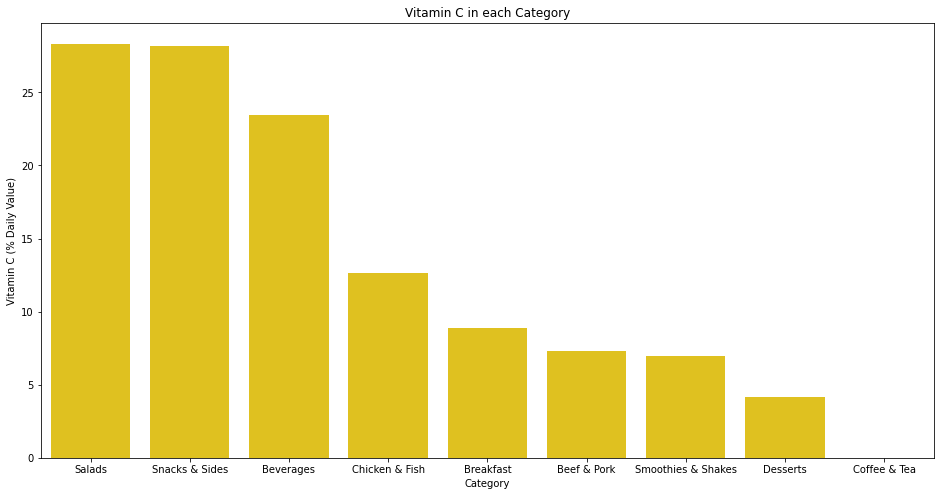

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

cat = df.groupby('Category')['Vitamin C (% Daily Value)'].mean().reset_index().sort_values('Vitamin C (% Daily Value)',ascending=False)

ax = sns.barplot(y = 'Vitamin C (% Daily Value)', x='Category', data=cat, color = 'Gold').set(title='Vitamin C in each Category')

No wonder that Salads Category contains many vitamins compared to other categories.

### **Calcium**

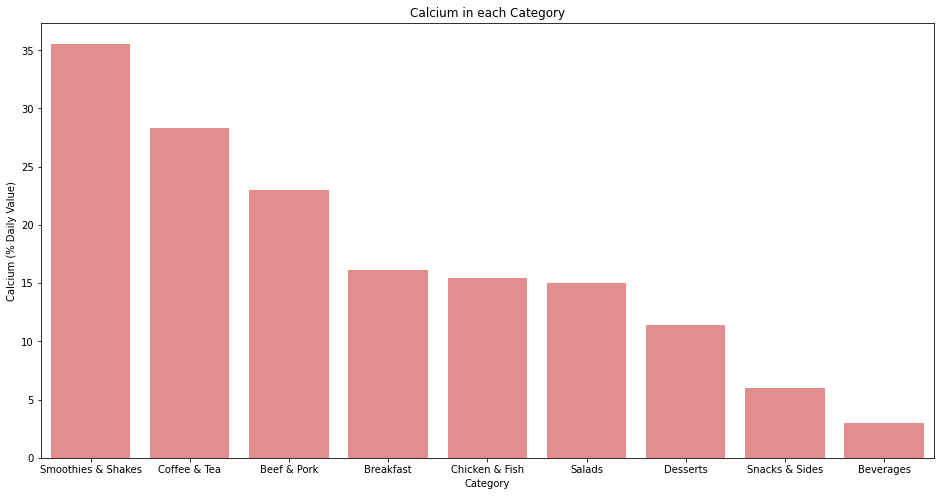

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

cat = df.groupby('Category')['Calcium (% Daily Value)'].mean().reset_index().sort_values('Calcium (% Daily Value)',ascending=False)

ax = sns.barplot(y = 'Calcium (% Daily Value)', x='Category', data=cat, color = 'lightcoral').set(title='Calcium in each Category')

### **Iron**

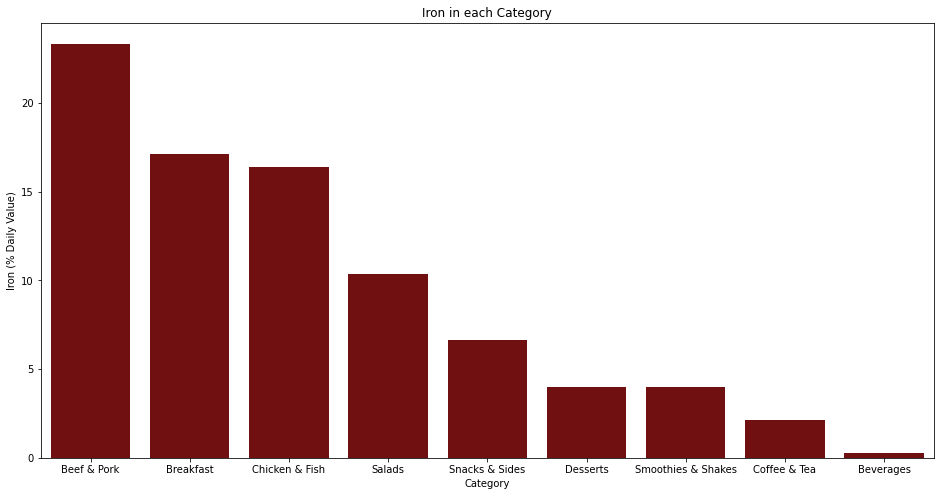

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

cat = df.groupby('Category')['Iron (% Daily Value)'].mean().reset_index().sort_values('Iron (% Daily Value)',ascending=False)

ax = sns.barplot(y = 'Iron (% Daily Value)', x='Category', data=cat, color = 'Maroon').set(title='Iron in each Category')

#**Menu Recommendation**#

To recommend the best McD's menu deals in terms of nutrition

In [0]:
def recommendation(x):
  data = df[:]
  data['Item'] = data.Item.str.lower()
  data = df[(df.Item.str.contains(x.lower()))&~(df.Item.str.contains('without'))].reset_index(drop=True)
  data = data.sort_values(['Saturated Fat','Trans Fat','Cholesterol','Protein','Carbohydrates','Dietary Fiber','Vitamin A (% Daily Value)',
                            'Vitamin C (% Daily Value)','Calcium (% Daily Value)','Iron (% Daily Value)'], ascending=[True,True,True,False,True,False,False,False,False,False])
  return data.head(10)

Example:

In [0]:
recommendation('bacon')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Calories
19,Salads,premium bacon ranch salad with grilled chicken,241.0,220,80,8.0,13,4.0,20,0.0,85,29,690,29,8,3,2,10,4,29,110,30,15,8,300
18,Chicken & Fish,bacon buffalo ranch mcchicken,161.0,430,190,21.0,32,5.0,25,0.0,50,17,1260,53,41,14,2,7,6,20,2,10,15,15,620
17,Salads,premium bacon ranch salad with crispy chicken,255.0,380,190,21.0,33,6.0,29,0.0,70,23,860,36,22,7,2,10,5,25,100,25,15,8,570
14,Breakfast,"bacon, egg & cheese mcgriddles with egg whites",178.0,400,140,15.0,24,7.0,34,0.0,35,11,1250,52,47,16,2,9,16,20,2,10,15,10,540
15,Chicken & Fish,bacon cheddar mcchicken,171.0,480,220,24.0,38,7.0,35,0.0,65,21,1260,53,43,14,2,8,6,22,4,10,20,15,700
16,Chicken & Fish,premium mcwrap chicken & bacon (grilled chicken),302.0,480,170,19.0,28,7.0,36,0.0,95,32,1370,57,42,14,3,13,6,36,60,25,20,20,650
13,Chicken & Fish,bacon clubhouse grilled chicken sandwich,270.0,590,230,25.0,39,8.0,42,0.0,110,37,1560,65,51,17,4,15,14,40,8,30,30,15,820
10,Breakfast,"bacon, egg & cheese mcgriddles",174.0,460,190,21.0,32,9.0,44,0.0,250,84,1250,52,48,16,2,9,15,19,10,10,20,15,650
11,Breakfast,"bacon, egg & cheese bagel with egg whites",201.0,570,230,25.0,39,9.0,45,0.5,60,20,1480,62,55,18,3,12,8,30,10,15,20,15,800
12,Chicken & Fish,premium mcwrap chicken & bacon (crispy chicken),316.0,630,280,32.0,49,9.0,45,0.5,80,26,1540,64,56,19,3,13,7,32,60,20,20,20,910
